Text(0, 0.5, 'DSC (μV/mg)')

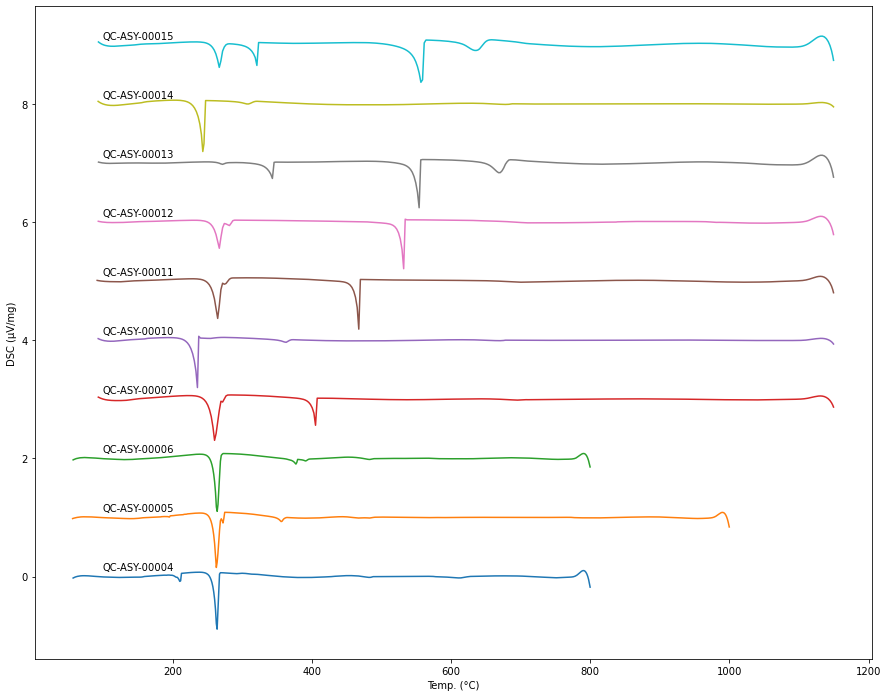

In [22]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
from scipy import signal as sig
from glob import glob
import matplotlib.pyplot as plt
# from read_netzsch_data import read_netzsch_data

def read_netzsch_data(file : str) -> pd.DataFrame:
    columns = ["Temp. °C", 
            "Time (min)", 
            "DSC (μV/mg)", 
            "Mass (%)", 
            "Purge Gas Flow no. 2 (ml/min)", 
            "Protection Gas Flow (ml/min)", 
            "Sensitivity (μV/mW)", 
            "Segment"]

    df = pd.read_csv(file, 
                    sep=';', 
                    decimal='.',
                    encoding="ANSI",
                    skip_blank_lines=True,
                    comment="#")
    df.columns = columns
    return df.drop(["Mass (%)", "Purge Gas Flow no. 2 (ml/min)", "Protection Gas Flow (ml/min)", "Sensitivity (μV/mW)"], axis=1)

def pop_cooling_segments(df):
    return df.loc[df["Segment"] == 3 or df["Segment"] == 7]

def pop_second_cooling(df):
    return df.loc[df["Segment"] == 7]

def pop_heating_segments(df):
    return df.loc[df["Segment"] == 1 or df["Segment"] == 5]
    
def pop_second_heating(df):
    return df.loc[df["Segment"] == 5]

def normalize_scale(df):
    dg = df["DSC (μV/mg)"]
    return (dg - dg.min())/(dg.max() - dg.min())

folder = r"C:\Users\mita3616\OneDrive - Stockholm University\Documents\.PhD\Quasicrystals\**\ExpDat*.txt"
files = glob(pathname=folder, recursive=True)

data = {file.split("ExpDat_")[1].strip('.txt') : read_netzsch_data(file) for file in files}

df = []
for f in files:
    df0 = read_netzsch_data
    df.append(df0)


AuSnYb_files = [file.split("ExpDat_")[1].strip('.txt') for file in files if "ASY" in file]
AuSn_files = [file.split("ExpDat_")[1].strip('.txt') for file in files if "AS0" in file]

labels = {'x':'Temp. (°C)', 'y':'DSC (μV/mg)'}

fig = plt.figure(figsize=[15,12])

c = 0

for k in AuSnYb_files:
    column = k
    cooling = pop_second_cooling(data[k])
    y = cooling["DSC (μV/mg)"]
    y = (y - y.min()) / (y.max() - y.min())
    x = cooling["Temp. °C"]

    size = y.shape[0]
    if  size % 2 == 0:
        wl = size - 1
    else:
        wl = size

    y_smooth = sig.savgol_filter(x = y, 
                                 window_length = 357, 
                                 polyorder = 7
                                 )

    y_subtract_baseline = y - y_smooth
    
    plt.plot(x, y_subtract_baseline + c)
    plt.text(100, c + 0.1, k)
    c += 1
plt.xlabel(labels["x"])
plt.ylabel(labels["y"])

In [3]:
labels={'x':'Time (min)', 'y':'DSC (μV/mg)'}

fig = px.line(y=df['DSC (μV/mg)'], 
              x=df["Time (min)"],
              labels=labels,
              title="Raw DSC signal")

fig_widget = go.FigureWidget(fig)
fig_widget

TypeError: list indices must be integers or slices, not str